# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ahmad Luthfi Amirulloh]
- **Email:** [m117b4ky0214@bangkit.academy]
- **ID Dicoding:** [ahmadluthfi10]

## Menentukan Pertanyaan Bisnis

- Produk apa saja yang sering dipesan oleh pelanggan di kota atau negara bagian tertentu?
-  Bagaimana distribusi berat dan ukuran produk dalam kategori produk tertentu mempengaruhi biaya pengiriman dan keterlambatan pengiriman?

# Proyek Analisis Data

## Menyaipkan semua library yang dibuthkan

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from google.colab import drive
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Wrangling

### Gathering Data

In [11]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks'
file_path = folder_path + '/products_dataset.csv'

products_df = pd.read_csv(file_path)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks'
file_path = folder_path + '/customers_dataset.csv'

customers_df = pd.read_csv(file_path)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks'
file_path = folder_path + '/orders_dataset.csv'

orders_df = pd.read_csv(file_path)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [147]:
folder_path = '/content/gdrive/MyDrive/Colab Notebooks'
file_path = folder_path + '/order_items_dataset.csv'

order_items_df = pd.read_csv(file_path)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### Menilai tabel products_df

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
products_df.isna().aggregate('sum')


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [19]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Outliers detected:
[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18350.0, 900.0, 400.0, 600.0, 1100.0, 7150.0, 250.0, 600.0, 200.0, 800.0, 400.0, 900.0, 1700.0, 500.0, 2550.0, 800.0, 500.0, 1800.0, 900.0, 3600.0, 300.0, 740.0, 3600.0, 650.0, 2150.0, 800.0, 8950.0, 1388.0, 7950.0, 6000.0, 263.0, 3900.0, 600.0, 2050.0, 725.0, 6350.0, 600.0, 11750.0, 2550.0, 15350.0, 1300.0, 850.0, 1300.0, 4800.0, 1300.0, 220.0, 5700.0, 450.0, 2000.0, 1100.0, 1400.0, 250.0, 1050.0, 500.0, 1467.0, 300.0, 950.0, 250.0, 12000.0, 921.0, 10000.0, 250.0, 1200.0, 4800.0, 700.0, 1050.0, 350.0, 422.0, 317.0, 16400.0, 938.0, 2700.0, 1750.0, 3850.0, 267.0, 16200.0, 1400.0, 6450.0, 2300.0, 105.0, 300.0, 600.0, 3600.0, 150.0, 400.0, 800.0, 5250.0, 200.0, 335.0, 1300.0, 150.0, 367.0, 250.0, 8500.0, 2150.0, 150.0, 650.0, 2700.0, 1200.0, 6050.0, 150.0, 1050.0, 1350.0, 600.0, 1000.0, 1550.0, 2700.0, 200.0, 800.0, 377.0, 400.0, 450.0, 2000.0, 300.0, 250.0, 1950.0, 500.0, 7900.0, 1800.0, 900.0, 200.0, 4500.0, 250.0, 550.0, 11

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

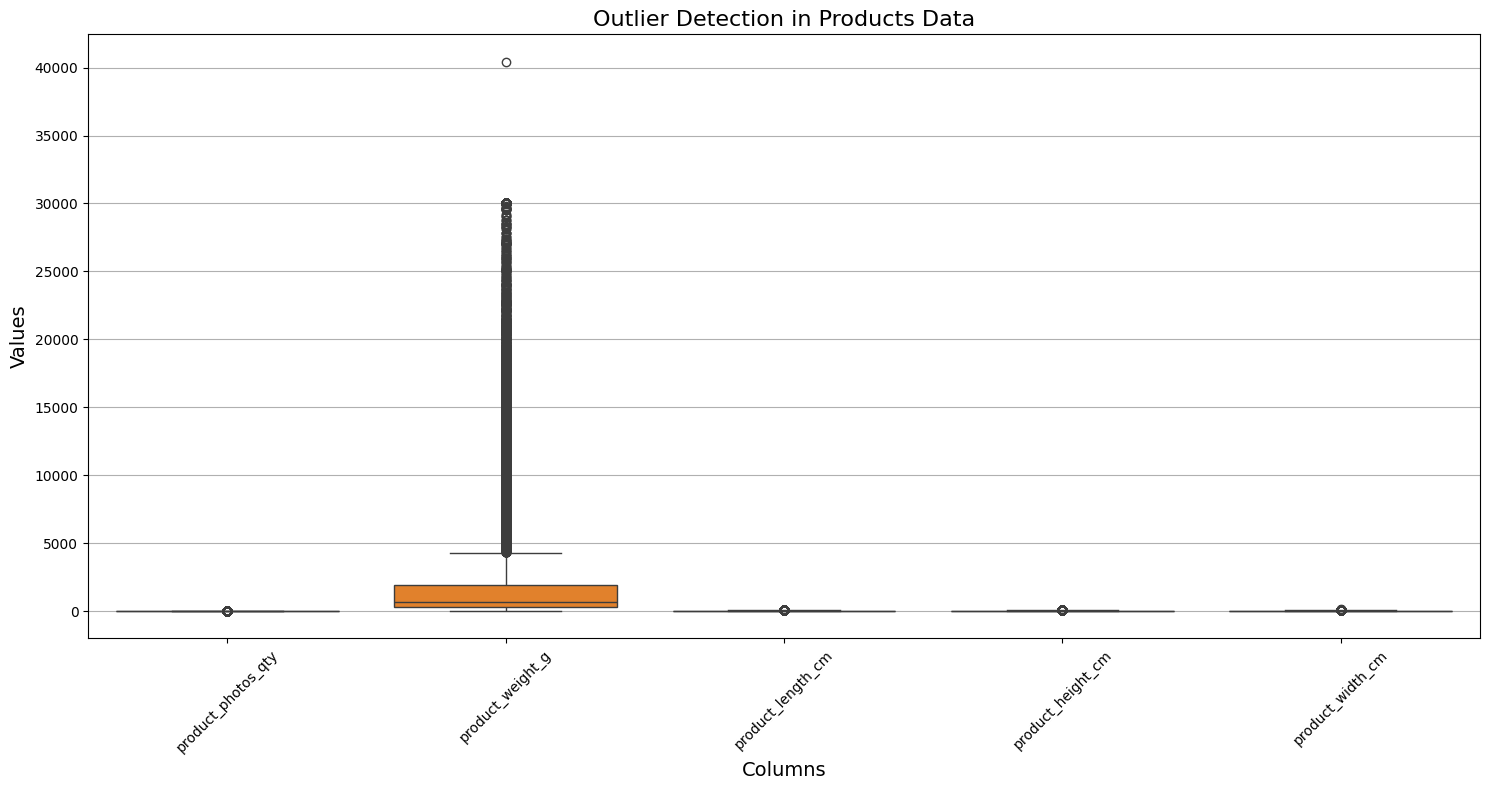

In [116]:
numeric_products_df = products_df.drop(columns=['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght'], errors='ignore')
numeric_products_df = numeric_products_df.astype(float)
data_values = numeric_products_df.values.flatten()
q25, q75 = np.percentile(data_values, 25), np.percentile(data_values, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum = q25 - cut_off
maximum = q75 + cut_off

outliers = [x for x in data_values if x < minimum or x > maximum]

print("Outliers detected:")
print(outliers)

plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_products_df)

plt.title('Outlier Detection in Products Data', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### Menilai tabel customers_df

In [21]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [22]:
customers_df.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


In [30]:
customers_df.isna().aggregate('sum')

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [23]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())


Jumlah duplikasi:  0


In [31]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel orders_df

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().aggregate('sum')

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [27]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())



Jumlah duplikasi:  0


In [29]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel orders_item_df

In [152]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [153]:
order_items_df.isna().aggregate('sum')

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [154]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())



Jumlah duplikasi:  0


In [155]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

#### Membersihkan tabel products_df

In [37]:
products_df.drop_duplicates(inplace=True)

In [38]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [114]:
products_df.dropna(inplace=True)

In [141]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


#### Membersihkan tabel orders_df

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


##### Memperbaiki tipe data

In [ ]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [ ]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


#### Membersihkan tabel customers_df

In [45]:
customers_df[customers_df.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [46]:
customers_df.drop_duplicates(inplace=True)

In [90]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [47]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Outliers removed. New DataFrame shape: (1625, 5)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

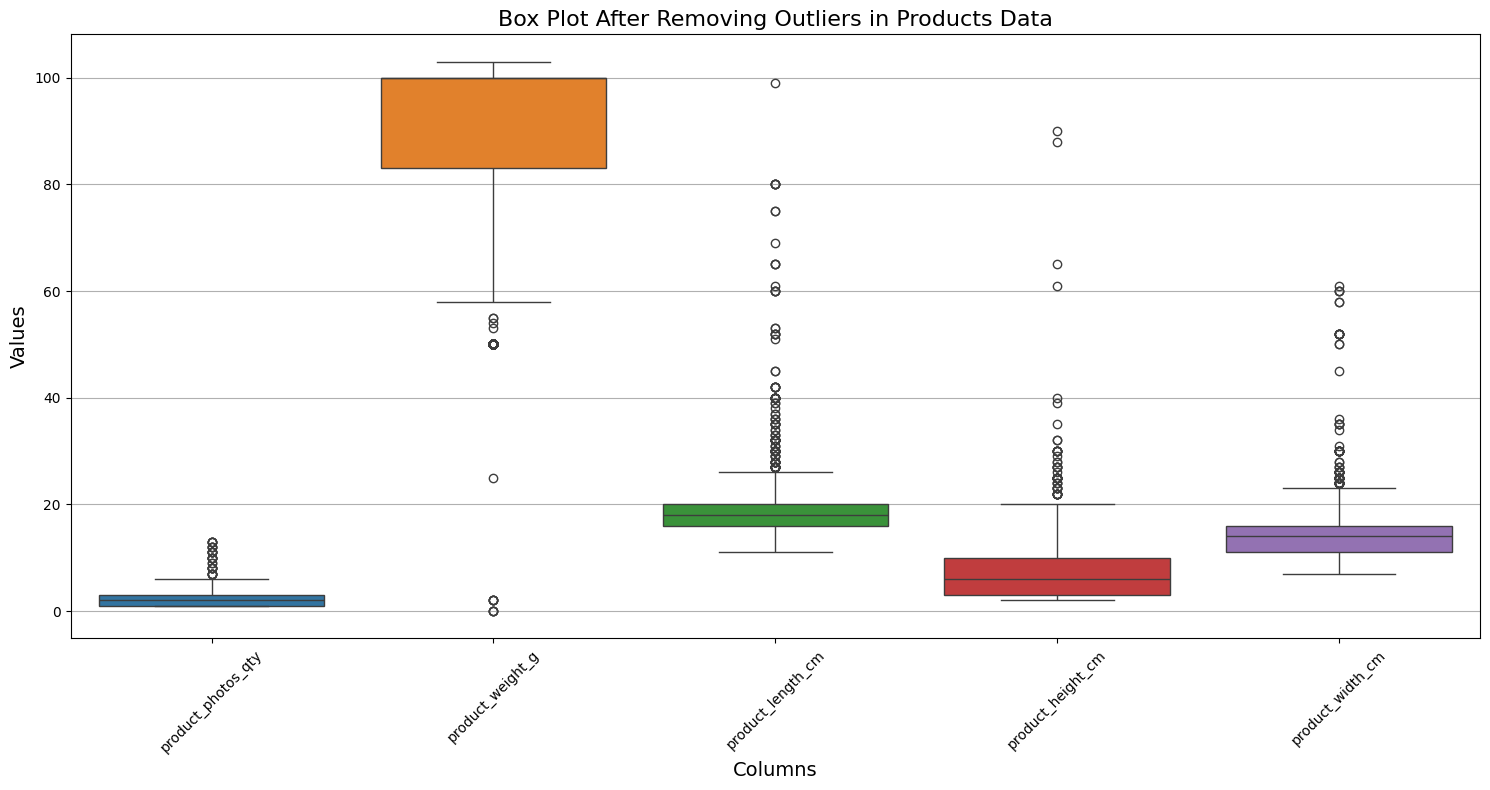

In [119]:
numeric_products_df = products_df.drop(columns=['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght'], errors='ignore')
numeric_products_df = numeric_products_df.astype(float)

data_values = numeric_products_df.values.flatten()
q25, q75 = np.percentile(data_values, 25), np.percentile(data_values, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum = q25 - cut_off
maximum = q75 + cut_off


cleaned_products_df = numeric_products_df[(numeric_products_df <= maximum) & (numeric_products_df >= minimum)].dropna()

print("Outliers removed. New DataFrame shape:", cleaned_products_df.shape)

plt.figure(figsize=(15, 8))
sns.boxplot(data=cleaned_products_df)

plt.title('Box Plot After Removing Outliers in Products Data', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


#### Membersihkan tabel orders_item_df

In [148]:
order_items_df.dropna(axis=0, inplace=True)


In [149]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [51]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
76965,7230de3e56839c3629d3f5112470b85a,0ef696905278c52ffe087778e1457d97,13171,sumare,SP
15940,645d58724df0468042044d31e6adf721,96f178f231d72f743ac6704512135fbc,72220,brasilia,DF
58814,022422df869df5d9e924456635d9b091,f02d645581f44f57678461d0e42f68ef,11015,santos,SP
47007,d722da5879a40dcc6a68bdeb5de48f99,6f8ecf0559ad3d0af81a036a45f9915d,6233,osasco,SP
6799,48d35ccbcd1e85743d67b4e0d564f7c9,a8d5a736f4170bac7347f216bf803053,21620,rio de janeiro,RJ


In [89]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [80]:
customers_df.customer_id.is_unique

True

In [85]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [86]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=True)

,customer_id
customer_state,
RR,46
AP,68
AC,81
AM,148
RO,253
TO,280
SE,350
AL,413
RN,485


### Explore orders_df

In [87]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
37634,838eddbec488679c7db905429c5163f7,5e629f5cad9941c1f83b0ac0e287348a,delivered,2018-05-15 20:29:06,2018-05-15 20:56:04,2018-05-17 12:53:00,2018-05-23 00:22:39,2018-06-06 00:00:00
68237,6b13656ef58757ab087064a5a263441d,9f330d42596f0b57e974509bac9c17da,delivered,2017-05-18 12:13:20,2017-05-19 02:15:22,2017-05-19 10:57:37,2017-05-24 16:44:33,2017-06-08 00:00:00
95327,41e096922c4b995c0f51f50efcdb80c0,f0031dc04ad8f531159ef6839bfa3c49,delivered,2018-03-22 15:21:56,2018-03-22 16:07:48,2018-03-23 22:03:29,2018-04-10 14:42:56,2018-04-18 00:00:00
44858,cedfe51bd6a794860c83382885f2328c,b806e26283f2008d98a22e44d0c3aa5a,delivered,2017-01-25 20:03:37,2017-01-26 02:15:57,2017-02-06 11:54:29,2017-02-09 09:38:09,2017-02-20 00:00:00
12581,3957b45bce42070cac232014ad4d001b,16f5cf0023d5d11a905dabc8ffe04c02,delivered,2017-10-13 23:59:12,2017-10-14 00:56:25,2017-10-18 15:34:34,2017-10-23 21:44:56,2017-10-31 00:00:00


In [99]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')
orders_df['Selisih'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days
orders_df['Selisih'] = orders_df['Selisih'].abs()
print(orders_df[['order_delivered_customer_date', 'order_estimated_delivery_date', 'Selisih']])


      order_delivered_customer_date order_estimated_delivery_date  Selisih
0               2017-10-10 21:25:13                    2017-10-18        8
1               2018-08-07 15:27:45                    2018-08-13        6
2               2018-08-17 18:06:29                    2018-09-04       18
3               2017-12-02 00:28:42                    2017-12-15       13
4               2018-02-16 18:17:02                    2018-02-26       10
...                             ...                           ...      ...
99436           2017-03-17 15:08:01                    2017-03-28       11
99437           2018-02-28 17:37:56                    2018-03-02        2
99438           2017-09-21 11:24:17                    2017-09-27        6
99439           2018-01-25 23:32:54                    2018-02-15       21
99440           2018-03-16 13:08:30                    2018-04-03       18

[96461 rows x 3 columns]


In [104]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_date,Selisih
75228,7021b6631e7eeee66d0c205798c9a8b0,08769b79055f98ab6f2878b6fbc39c62,delivered,2018-02-25 14:01:00,2018-02-25 14:10:29,2018-02-26 22:36:54,2018-03-15 21:48:27,2018-03-20,2018-03-15 21:48:27,5
2539,336f7fe8abc3af0bf30d0cf7204ec20f,f23d6ec4c1e7f186e9a82c6014d39533,delivered,2017-06-28 12:39:28,2017-06-28 12:55:12,2017-07-04 14:55:55,2017-07-05 17:13:29,2017-07-11,2017-07-05 17:13:29,6
57988,e2456fa3a339b1e8aa3ea8045a1ead4e,12884df92231ffd06d822698027ce61a,delivered,2017-11-04 10:11:43,2017-11-04 10:25:45,2017-11-06 19:32:20,2017-11-16 18:49:49,2017-11-28,2017-11-16 18:49:49,12
93382,1d96a7c14a9528634756937849d8467d,5919de102d7a96027a3f94b585e0ec25,delivered,2018-01-19 12:16:50,2018-01-23 03:37:43,2018-01-23 18:37:55,2018-01-30 19:12:00,2018-02-19,2018-01-30 19:12:00,20
45350,89b939af6aada7003d4d2930b87d8b68,650dd9e8340ce0d99ea8bcddb610c529,delivered,2017-09-10 23:03:19,2017-09-10 23:15:15,2017-09-11 20:32:11,2017-09-14 22:21:57,2017-09-28,2017-09-14 22:21:57,14


In [120]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
63365,44e3a4d56bff0ee1e71df577e741b7a7,68b091fe5fca75c2128b1fc714090a84,13860,aguai,SP,Non Active
18085,c2ddb4af80101150ea4ab7b7de63e95c,82689e662b9ee3779b197585f113a6ee,40735,salvador,BA,Non Active
21105,4d30d32398120943b2a800664e7cd180,502cc5f92b484e9db94c93d5cc6b7a8e,71680,brasilia,DF,Non Active
41729,57f0329a42dc7c06a16fc1abebc1e84c,801e6d205ff6ea1f0ac9132ccecba63b,5013,sao paulo,SP,Non Active
50471,6a8cd2fcf8edc180f478cdb30c2db869,d276fb722cd56bf609a6bfa894ebffb8,16020,aracatuba,SP,Non Active


In [121]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Non Active,99441


In [122]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Non Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Non Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Non Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Non Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Non Active
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Non Active
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Non Active
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Non Active
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Non Active


### Explore orders_items_df

In [157]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
98537,df77d1821312c74489233b53e2359215,1,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2018-03-29 15:28:56,169.99,23.55
31274,46f05e5ae3a2b822e2f4148d99f69ca4,1,b4f9530c931398e215242293c2c8ba4c,4e922959ae960d389249c378d1c939f5,2017-01-22 19:24:49,45.00,17.91
9731,164eb359d3649dc1dd4bc6adcb1bb0a8,1,6002665d65ee348dcd357c7bb2f080bd,f45122a9ab94eb4f3f8953578bc0c560,2017-05-18 11:55:11,59.99,13.44
15627,23b8bfc2f57aaf36121b2c631d5724b8,1,1b42d5d23103d5b706f8107ce7549920,e333046ce6517bd8bb510291d44f0130,2017-07-19 23:43:20,109.00,16.52
260,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30


In [160]:
order_items_df.groupby(by="order_item_id").agg({
    "product_id": "nunique",
    "freight_value": "sum",
    "price": ["min", "max"]
})

product_id freight_value price         
                 nunique           sum   min      max
order_item_id                                        
1                  31881    1993243.31  0.85  6735.00
2                   6089     181727.05  0.85  2299.95
3                   1763      41693.59  1.20  1790.00
4                    809      18090.08  1.20  1790.00
5                    393       8527.45  1.20  1680.00
6                    231       4955.14  1.20  1680.00
7                     58       1103.55  1.20  1680.00
8                     35        801.15  1.20  1680.00
9                     28        548.44  1.20   284.99
10                    25        397.16  1.20   284.99
11                    17        295.79  1.20   179.99
12                    13        158.59  1.20   108.00
13                     8         78.47  1.20   100.00
14                     7         71.08  1.20   100.00
15                     5         49.87  1.20   100.00
16                     3         32.45  1.20   100.00
17                     3         32.45  1.20   100.00
18                     3         32.45  1.20   100.00
19                     3         32.45  1.20   100.00
20                     3         32.45  1.20   100.00
21                     1          6.57  7.80     7.80

### Explore product_df

In [125]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17394,713995c5e8e2dd40bfbe5a2eccd45356,instrumentos_musicais,58.0,802.0,2.0,4900.0,18.0,30.0,29.0
30175,117d03b1d09e534e76b4f4ac9d908b49,papelaria,53.0,303.0,1.0,310.0,21.0,7.0,15.0
8784,cd01322dc5017823eaa0744292c193cf,relogios_presentes,47.0,674.0,1.0,255.0,18.0,11.0,14.0
11501,b7d8104067b422204524dcd4706894b1,moveis_cozinha_area_de_servico_jantar_e_jardim,59.0,1248.0,4.0,10950.0,16.0,82.0,50.0
23828,e56f102e763165e7e32d0f9955f8ee4a,pcs,50.0,1869.0,5.0,1700.0,36.0,6.0,33.0
29481,3c93c9bcf16515a2c279990471744198,moveis_decoracao,41.0,992.0,1.0,1050.0,17.0,27.0,17.0
26878,f7fce9a4e86a0d19818cc145ef87f8ca,fashion_bolsas_e_acessorios,54.0,719.0,2.0,200.0,16.0,2.0,11.0
29649,e430b2d0b990d419435ab2803b430fb3,esporte_lazer,37.0,313.0,2.0,435.0,19.0,23.0,19.0
18153,bf3f9743aeca956fe97611364fec85d9,informatica_acessorios,28.0,1122.0,1.0,185.0,16.0,9.0,13.0
27060,0ab78aeb8039e8ee1d47412e56baded3,consoles_games,54.0,342.0,1.0,200.0,17.0,3.0,14.0


In [126]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [128]:
products_df.sort_values(by="product_category_name", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
17366,01ea398598302b06869909ac5bfa5bcf,utilidades_domesticas,56.0,649.0,1.0,5000.0,35.0,28.0,32.0
22551,9f70acf998b0bd14652234075a19d358,utilidades_domesticas,25.0,326.0,1.0,1400.0,38.0,5.0,21.0
22575,2514ff519f69595934371404ff50911d,utilidades_domesticas,44.0,752.0,4.0,445.0,19.0,12.0,12.0
3319,eb464e3e06e2701a532c9f08a774d0d0,utilidades_domesticas,50.0,440.0,1.0,148.0,25.0,27.0,22.0
11749,021d39ee869e87d5288f4e731df4a90e,utilidades_domesticas,44.0,663.0,4.0,10350.0,102.0,15.0,40.0
...,...,...,...,...,...,...,...,...,...
28803,5b951e54437768080925aabe01e24348,agro_industria_e_comercio,54.0,747.0,1.0,380.0,22.0,11.0,14.0
9383,1f541a93f4fa4b8d15c7d5ed83836484,agro_industria_e_comercio,50.0,418.0,1.0,12850.0,41.0,42.0,47.0
19739,f075897551d47345068c1d90ed454fe1,agro_industria_e_comercio,48.0,948.0,1.0,6820.0,54.0,54.0,35.0
28858,fbec390384fbb8d53d97c29a5bbb26ae,agro_industria_e_comercio,38.0,145.0,1.0,1640.0,37.0,34.0,31.0


In [131]:
products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_name_lenght": "sum",
    "product_weight_g":  ["min", "max"]
})

product_id product_name_lenght product_weight_g  \
                             nunique                 sum              min   
product_category_name                                                       
agro_industria_e_comercio         74              3634.0             50.0   
alimentos                         82              3797.0             75.0   
alimentos_bebidas                104              4629.0             50.0   
artes                             55              2590.0            100.0   
artes_e_artesanato                19               841.0            100.0   
...                              ...                 ...              ...   
sinalizacao_e_seguranca           93              4449.0            100.0   
tablets_impressao_imagem           9               486.0            100.0   
telefonia                       1134             57211.0             50.0   
telefonia_fixa                   116              5617.0             50.0   
utilidades_domesticas           2335            112121.0             50.0   

                                    
                               max  
product_category_name               
agro_industria_e_comercio  30000.0  
alimentos                   8238.0  
alimentos_bebidas          10800.0  
artes                      15400.0  
artes_e_artesanato          6850.0  
...                            ...  
sinalizacao_e_seguranca    27100.0  
tablets_impressao_imagem    1100.0  
telefonia                   8100.0  
telefonia_fixa              6050.0  
utilidades_domesticas      30000.0  

[73 rows x 4 columns]

### Explore all data

#### Menghubungkan semua data

In [165]:
drive.mount('/content/gdrive')

folder_path = '/content/gdrive/MyDrive/Colab Notebooks'
all_data_file_path = folder_path + '/all_data.csv'

orders_file_path = folder_path + '/orders_dataset.csv'
customers_file_path = folder_path + '/customers_dataset.csv'
order_items_file_path = folder_path + '/order_items_dataset.csv'
products_file_path = folder_path + '/products_dataset.csv'
category_translation_file_path = folder_path + '/product_category_name_translation.csv'

orders_df = pd.read_csv(orders_file_path)
customers_df = pd.read_csv(customers_file_path)
order_items_df = pd.read_csv(order_items_file_path)
products_df = pd.read_csv(products_file_path)
category_translation_df = pd.read_csv(category_translation_file_path)

orders_customers_df = orders_df.merge(customers_df, on='customer_id', how='left')
orders_items_customers_df = orders_customers_df.merge(order_items_df, on='order_id', how='left')
all_data = orders_items_customers_df.merge(products_df, on='product_id', how='left')

all_data = all_data.merge(category_translation_df, left_on='product_category_name', right_on='product_category_name', how='left')

all_data.to_csv(all_data_file_path, index=False)

print("Data gabungan telah disimpan di:", all_data_file_path)
print(all_data.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Data gabungan telah disimpan di: /content/gdrive/MyDrive/Colab Notebooks/all_data.csv
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018

In [210]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

1. Produk apa saja yang sering dipesan oleh pelanggan di kota atau negara bagian tertentu?

In [212]:
all_df.sample(50)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
82408,4576179bf61955429e5ddf487e7dbad7,fb1442fddb3de56fa6ff095c77b296e7,delivered,2017-11-20 22:13:33,2017-11-20 22:27:59,2017-11-21 19:22:09,2017-11-24 19:47:47,2017-12-08 00:00:00,906b39303c8095e6ddec2189c4757317,36570,vicosa,MG,1.0,5ac31d4825e0f3d9077465c57d4cef3b,3c7c4a49ec3c6550809089c6a2ca9370,2017-11-26 22:27:29,99.90,15.45,perfumaria,45.0,974.0,2.0,100.0,16.0,11.0,14.0,perfumery
39377,7139cfc52657eafe990b5b23ed163482,05929b58add0a2e46bb430439b7130a9,delivered,2018-02-04 10:33:14,2018-02-04 11:09:26,2018-02-06 20:25:41,2018-02-11 16:25:48,2018-03-01 00:00:00,3cb7760625ccc233fab4e975e0a9c5c1,18210,itapetininga,SP,1.0,7ac5f520abfc0589418bc7c76cea7a7c,8160255418d5aaa7dbdc9f4c64ebda44,2018-02-08 11:09:26,119.90,13.86,cama_mesa_banho,59.0,349.0,2.0,1550.0,30.0,10.0,30.0,bed_bath_table
59837,02b39a781ee24f6997ad691ea7a01491,a926ff5e07e6155bf31456e33c21f276,delivered,2017-12-10 12:04:08,2017-12-10 12:13:25,2017-12-12 23:12:54,2017-12-17 17:54:59,2018-01-12 00:00:00,6aa2294d9975e319365a586ba919de73,5782,sao paulo,SP,1.0,130482add9fd75ccb6c57ba007694a2d,87142160b41353c4e5fca2360caf6f92,2017-12-15 12:13:25,105.00,21.57,informatica_acessorios,55.0,60.0,1.0,2800.0,40.0,15.0,40.0,computers_accessories
32392,b83386c51767724444bf697eb4c64b30,b55606c2285147417c87a9726c93952c,delivered,2017-05-06 14:07:21,2017-05-06 14:22:16,2017-05-09 07:59:44,2017-05-23 12:59:32,2017-06-02 00:00:00,31bf606c8e1ec22223a013e8f4081655,95315,caseiros,RS,1.0,f71973c922ccaab05514a36a8bc741b8,5dceca129747e92ff8ef7a997dc4f8ca,2017-05-11 14:22:16,109.90,42.76,malas_acessorios,47.0,482.0,2.0,16100.0,35.0,65.0,44.0,luggage_accessories
1477,c6094f6ab0c25eda761622ab09aa423d,69ee62ecc8d2937fca0e1a3d4de5a2ce,delivered,2018-07-25 10:16:15,2018-07-25 10:30:20,2018-07-26 14:31:00,2018-07-30 17:29:34,2018-08-22 00:00:00,9b82602fc3e9a153752f16553752d58d,21930,rio de janeiro,RJ,1.0,fbc1488c1a1e72ba175f53ab29a248e8,289cdb325fb7e7f891c38608bf9e0962,2018-07-27 10:30:20,118.80,15.94,perfumaria,27.0,311.0,1.0,560.0,19.0,13.0,17.0,perfumery
75476,206f333916267029d74feda364a2e31a,e40110f034ca7e6eceb06342d37a011b,delivered,2018-01-02 21:42:46,2018-01-02 21:50:27,2018-01-03 15:59:10,2018-01-26 16:29:17,2018-02-05 00:00:00,23e529fe940a3eb6a29e7cff68084b0b,28396,purilandia,RJ,1.0,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2018-01-08 21:50:27,166.99,27.49,cool_stuff,40.0,1456.0,1.0,2425.0,29.0,30.0,19.0,cool_stuff
59853,65bd34264e92e55142465420aad29126,66ce46e4ab8582ed7de4e569f26d9de3,delivered,2017-11-22 16:46:44,2017-11-24 03:12:11,2017-11-24 19:08:28,2017-12-05 22:48:50,2017-12-14 00:00:00,9e5b538cbc34e0a47723c4b0eb8ea6b0,76270,jussara,GO,1.0,51250f90d798d377a1928e8a4e2e9ae1,3c7c4a49ec3c6550809089c6a2ca9370,2017-11-30 03:11:11,13.99,15.10,perfumaria,54.0,937.0,1.0,50.0,16.0,5.0,11.0,perfumery
36274,e0ff8fbdba29b1192269bb50ef72245e,02acb1d49edb6c09b61d2f496afc61b5,delivered,2018-02-04 21:02:18,2018-02-04 21:15:32,2018-02-06 00:16:41,2018-02-15 23:27:48,2018-03-05 00:00:00,bfe14bfa136397036c4fd0cade75c68c,29142,cariacica,ES,1.0,cb9cc307a215ac435ec87b0f799e8dab,f680f85bee2d253556ac91be391d2c82,2018-02-08 21:15:32,199.90,26.15,ferramentas_jardim,36.0,1049.0,1.0,5450.0,23.0,7.0,20.0,garden_tools
19548,21803e14b4e860720b86788c8234ecd0,63da9210d7c5c8a472ad552135e0df2c,delivered,2018-05-08 05:11:02,2018-05-08 05:33:33,2018-05-08 15:32:00,2018-05-16 21:03:44,2018-05-28 00:00:00,0e3f7075209c31fb44c257041cd4f1f9,7174,guarulhos,SP,2.0,a95b1b0d6999743b294c57dd455afe83,dfa0c4c622

In [ ]:
popular_products_city = all_data.groupby(['customer_city', 'product_id']).size().reset_index(name='order_count')
popular_products_with_category = popular_products_city.merge(
    all_data[['product_id', 'product_category_name_english']].drop_duplicates(),
    on='product_id',
    how='left'
)

popular_products_with_category = popular_products_with_category[['product_id', 'product_category_name_english', 'customer_city', 'order_count']]
popular_products_with_category.head(100)


,product_id,product_category_name_english,customer_city,order_count
0,1081ae52311daac87fb54ba8ce4670ac,sports_leisure,abadia dos dourados,1
1,418d480693f2f01e9cf4568db0346d28,cool_stuff,abadia dos dourados,1
2,c1aabbb6f4caec9f5bf7cd80519d6cc0,books_general_interest,abadia dos dourados,1
3,0a9b9a871ffaec6c0198334558a6c6a1,small_appliances,abadiania,1
4,3354a4e684f5e7199f9407db70ccd92b,cool_stuff,abaete,1
...,...,...,...,...
95,422879e10f46682990de24d770e7f83d,garden_tools,acreuna,1
96,506a50e2a24273052e1ed28217b78733,industry_commerce_and_business,acreuna,1
97,788c7d26301bf6647bc50339f16fe67b,health_beauty,acreuna,1
98,81d879a43537a2803762ce12282ccbc9,small_appliances,acreuna,2


In [ ]:
total_orders_per_city = popular_products_with_category.groupby('customer_city')['order_count'].sum().reset_index()
total_orders_per_city = total_orders_per_city.sort_values(by='order_count', ascending=False)
total_orders_per_city.head(10)


,customer_city,order_count
3588,sao paulo,17808
3147,rio de janeiro,7837
452,belo horizonte,3144
557,brasilia,2392
1141,curitiba,1751
705,campinas,1654
2956,porto alegre,1612
3239,salvador,1412
1526,guarulhos,1329
3420,sao bernardo do campo,1060


In [224]:
top_cities = total_orders_per_city.head(10)['customer_city'].tolist()
popular_products_in_top_cities = popular_products_with_category[popular_products_with_category['customer_city'].isin(top_cities)]
most_ordered_products_per_city = popular_products_in_top_cities.groupby(['customer_city', 'product_category_name_english']).agg({'order_count': 'sum'}).reset_index()
most_ordered_products_per_city = most_ordered_products_per_city.sort_values(['customer_city', 'order_count'], ascending=[True, False])

most_ordered_products_per_city.head(20)


,customer_city,product_category_name_english,order_count
7,belo horizonte,bed_bath_table,351
38,belo horizonte,health_beauty,274
13,belo horizonte,computers_accessories,256
34,belo horizonte,furniture_decor,246
44,belo horizonte,housewares,245
58,belo horizonte,sports_leisure,214
61,belo horizonte,toys,143
62,belo horizonte,watches_gifts,129
37,belo horizonte,garden_tools,124
5,belo horizonte,auto,105


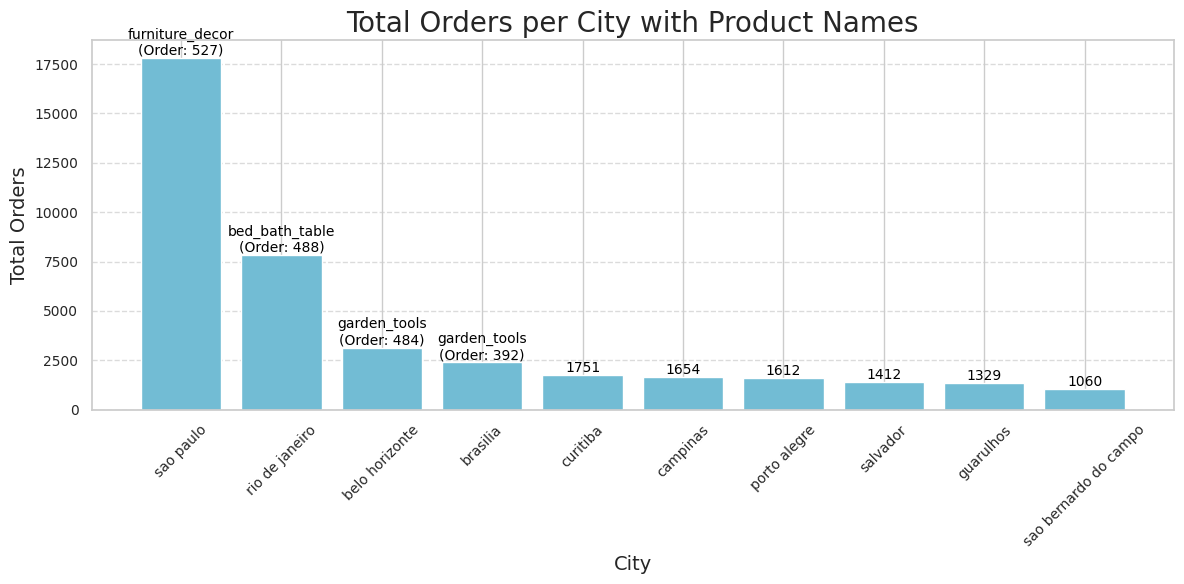

In [239]:

total_orders_per_city = popular_products_with_category.groupby('customer_city')['order_count'].sum().reset_index()
total_orders_per_city = total_orders_per_city.sort_values(by='order_count', ascending=False)
top_cities = total_orders_per_city.head(10)
popular_products = popular_products_with_category.groupby(['product_id', 'product_category_name_english'])['order_count'].sum().reset_index()
popular_products = popular_products.sort_values(by='order_count', ascending=False)
top_products = popular_products.head(4)
plt.figure(figsize=(12, 6))

bars = plt.bar(top_cities['customer_city'], top_cities['order_count'], color="#72BCD4")
plt.title("Total Orders per City with Product Names", loc="center", fontsize=20)
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    if i < len(top_products):
        product_name = top_products.iloc[i]['product_category_name_english']
        product_orders = top_products.iloc[i]['order_count']
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f"{product_name}\n(Order: {product_orders})", ha='center', va='bottom', fontsize=10, color='black')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f"{yval}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


2. Bagaimana distribusi berat dan ukuran produk dalam kategori produk tertentu mempengaruhi biaya pengiriman dan keterlambatan pengiriman?

In [ ]:
all_data['order_delivered_customer_date'] = pd.to_datetime(all_data['order_delivered_customer_date'], errors='coerce')
all_data['order_estimated_delivery_date'] = pd.to_datetime(all_data['order_estimated_delivery_date'], errors='coerce')
all_data['delivery_delay'] = abs((all_data['order_delivered_customer_date'] - all_data['order_estimated_delivery_date']).dt.days)

category_shipping_analysis = all_data.groupby('product_category_name_english').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean',
    'freight_value': 'mean',
    'delivery_delay': 'mean'
}).reset_index()

category_shipping_analysis = category_shipping_analysis.sort_values(by='freight_value', ascending=False)

print(category_shipping_analysis.head(100))


              product_category_name_english  product_weight_g  product_length_cm  product_height_cm  product_width_cm  freight_value  delivery_delay
14                                computers       7216.798030          26.211823          37.014778         41.669951      48.454680       12.814070
45                        home_appliances_2       8957.571429          45.407563          30.079832         37.747899      44.538571       15.112554
41        furniture_mattress_and_upholstery       7557.894737          58.500000          21.947368         72.578947      42.906842       11.270270
51  kitchen_dining_laundry_garden_furniture       8852.850534          46.010676          32.081851         34.551601      42.702598       13.233577
38                        furniture_bedroom       9989.220183          64.201835          31.036697         32.137615      42.497523       14.582524
..                                      ...               ...                ...                ...       

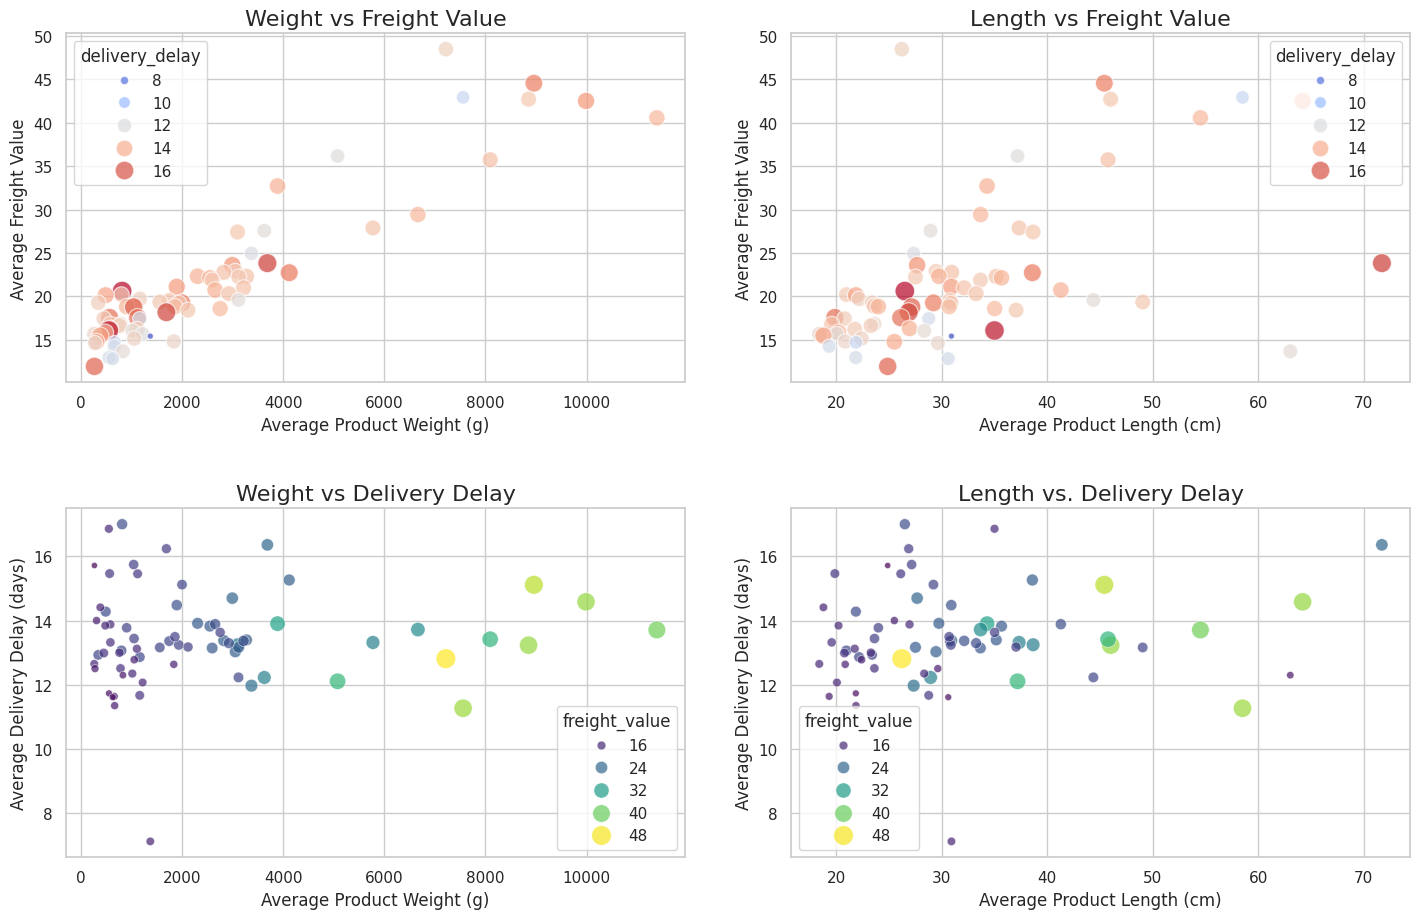

In [261]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0],
                data=category_shipping_analysis,
                x='product_weight_g',
                y='freight_value',
                hue='delivery_delay',
                size='delivery_delay',
                sizes=(20, 200),
                palette='coolwarm',
                alpha=0.7)

axes[0, 0].set_title('Weight vs Freight Value', fontsize=16)
axes[0, 0].set_xlabel('Average Product Weight (g)', fontsize=12)
axes[0, 0].set_ylabel('Average Freight Value', fontsize=12)

sns.scatterplot(ax=axes[0, 1],
                data=category_shipping_analysis,
                x='product_length_cm',
                y='freight_value',
                hue='delivery_delay',
                size='delivery_delay',
                sizes=(20, 200),
                palette='coolwarm',
                alpha=0.7)

axes[0, 1].set_title('Length vs Freight Value', fontsize=16)
axes[0, 1].set_xlabel('Average Product Length (cm)', fontsize=12)
axes[0, 1].set_ylabel('Average Freight Value', fontsize=12)

sns.scatterplot(ax=axes[1, 0],
                data=category_shipping_analysis,
                x='product_weight_g',
                y='delivery_delay',
                hue='freight_value',
                size='freight_value',
                sizes=(20, 200),
                palette='viridis',
                alpha=0.7)

axes[1, 0].set_title('Weight vs Delivery Delay', fontsize=16)
axes[1, 0].set_xlabel('Average Product Weight (g)', fontsize=12)
axes[1, 0].set_ylabel('Average Delivery Delay (days)', fontsize=12)

sns.scatterplot(ax=axes[1, 1],
                data=category_shipping_analysis,
                x='product_length_cm',
                y='delivery_delay',
                hue='freight_value',
                size='freight_value',
                sizes=(20, 200),
                palette='viridis',
                alpha=0.7)

axes[1, 1].set_title('Length vs. Delivery Delay', fontsize=16)
axes[1, 1].set_xlabel('Average Product Length (cm)', fontsize=12)
axes[1, 1].set_ylabel('Average Delivery Delay (days)', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()


### Geospatial Analysis







In [253]:
cities_data = {
    'customer_city': ['sao paulo', 'rio de janeiro', 'belo horizonte', 'salvador', 'curitiba'],
    'latitude': [-23.5505, -22.9068, -19.9191, -12.9714, -25.4297],
    'longitude': [-46.6333, -43.1729, -43.9376, -38.5014, -49.2719]
}
cities_df = pd.DataFrame(cities_data)

total_orders_per_city = popular_products_with_category.groupby('customer_city')['order_count'].sum().reset_index()
geo_data = total_orders_per_city.merge(cities_df, on='customer_city', how='left')
print(geo_data.isnull().sum())
geo_data = geo_data.dropna(subset=['latitude', 'longitude'])


customer_city       0
order_count         0
latitude         4105
longitude        4105
dtype: int64


In [258]:

m = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in geo_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['customer_city']}: {row['order_count']} pesanan",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

m.save("peta_jumlah_pesanan.html")
m


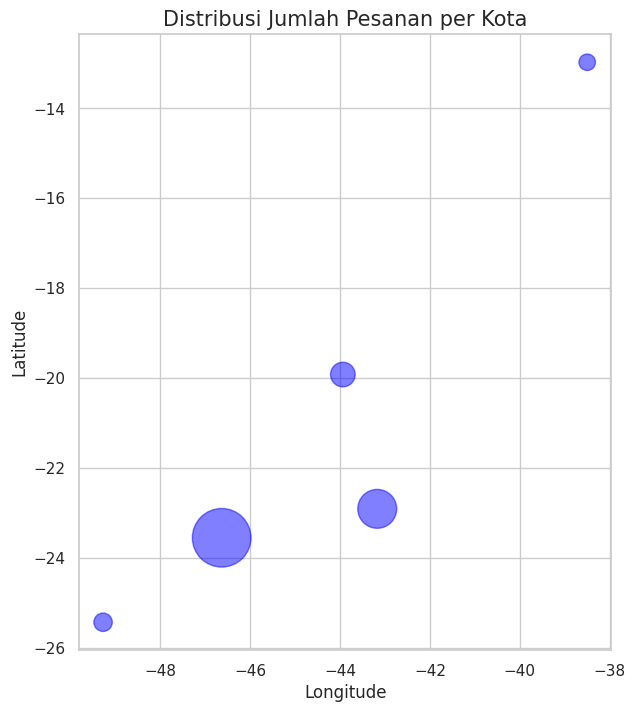

In [255]:

gdf = gpd.GeoDataFrame(geo_data,
                       geometry=gpd.points_from_xy(geo_data.longitude, geo_data.latitude))

ax = gdf.plot(marker='o', color='blue', markersize=gdf['order_count']/10, alpha=0.5, figsize=(12, 8))
ax.set_title('Distribusi Jumlah Pesanan per Kota', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

## Conclusion

1. Sao Paulo adalah pusat dari aktivitas pemesanan, dengan total pesanan yang sangat tinggi, sehingga menjadi target yang ideal untuk strategi pemasaran.Produk dalam kategori furniture_decor dan bed_bath_table menunjukkan minat konsumen yang signifikan, dan bisnis harus mempertimbangkan untuk meningkatkan stok dan promosi untuk kategori ini.

2. Distribusi berat dan ukuran produk dalam kategori tertentu menunjukkan adanya hubungan yang signifikan antara kedua faktor tersebut dengan biaya pengiriman dan keterlambatan pengiriman. Semakin berat dan besar ukuran produk, semakin tinggi biaya pengiriman yang dikenakan dan semakin lama keterlambatan yang dialami. Visualisasi data melalui scatter plots mengungkapkan pola di mana produk dengan berat antara 2000 hingga 8000 gram dan panjang antara 30 hingga 100 cm cenderung memiliki biaya pengiriman yang tinggi serta keterlambatan yang lebih lama

3. Analisis geospasial memberikan wawasan yang kuat tentang bagaimana lokasi geografis dapat mempengaruhi jumlah pesanan. Ini mengindikasikan bahwa strategi pemasaran dan distribusi yang ditargetkan dapat lebih efektif jika dipertimbangkan berdasarkan lokasi.